In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import os
os.listdir('/kaggle/input')

['loan-predication']

In [3]:
os.listdir('/kaggle/input/loan-predication')

['train_u6lujuX_CVtuZ9i (1).csv']

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split  ,cross_val_score
from sklearn.preprocessing import StandardScaler , PowerTransformer ,OrdinalEncoder ,OneHotEncoder
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import make_pipeline , Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

In [28]:
data = pd.read_csv('/kaggle/input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv')
data.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [29]:
data=data.drop('Loan_ID',axis=1)

In [30]:
data.shape[1]
data.sample(5)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
373,Male,No,1,Graduate,No,3062,1987.0,111.0,180.0,0.0,Urban,N
544,Female,Yes,0,Not Graduate,No,3017,663.0,102.0,360.0,NaN,Semiurban,Y
526,Male,Yes,0,Graduate,No,3775,0.0,110.0,360.0,1.0,Semiurban,Y
82,Female,Yes,2,Graduate,No,1378,1881.0,167.0,360.0,1.0,Urban,N
546,Male,No,0,Not Graduate,No,3358,0.0,80.0,36.0,1.0,Semiurban,N


In [31]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [32]:
data['Dependents'].unique()
data['Dependents'].dtype

dtype('O')

**data['Dependents']** was a mix of numerical and cetgorical data like '3+' etc so '+' is **removed** so that **numerical operations** can be performed on it 

In [33]:
data['Dependents'] = data['Dependents'].astype(str)
data['Dependents'] = data['Dependents'].str.replace('+', '', regex=False)
data['Dependents'] =data['Dependents'].replace(['nan', 'NaN', '', 'None'], np.nan)
data['Dependents'] = pd.to_numeric(data['Dependents'], errors='coerce')


In [34]:
data['Dependents'].dtype

dtype('float64')

In [11]:
numeric_column=data.iloc[:,[2,5,6,7,8,9]]
categorical_column=data.iloc[:,[0,1,3,4,10]]
numeric_column.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,5849,0.0,NaN,360.0,1.0
1,1.0,4583,1508.0,128.0,360.0,1.0
2,0.0,3000,0.0,66.0,360.0,1.0
3,0.0,2583,2358.0,120.0,360.0,1.0
4,0.0,6000,0.0,141.0,360.0,1.0


In [12]:
input_values=data.drop('Loan_Status' , axis=1)
output_values=data['Loan_Status']

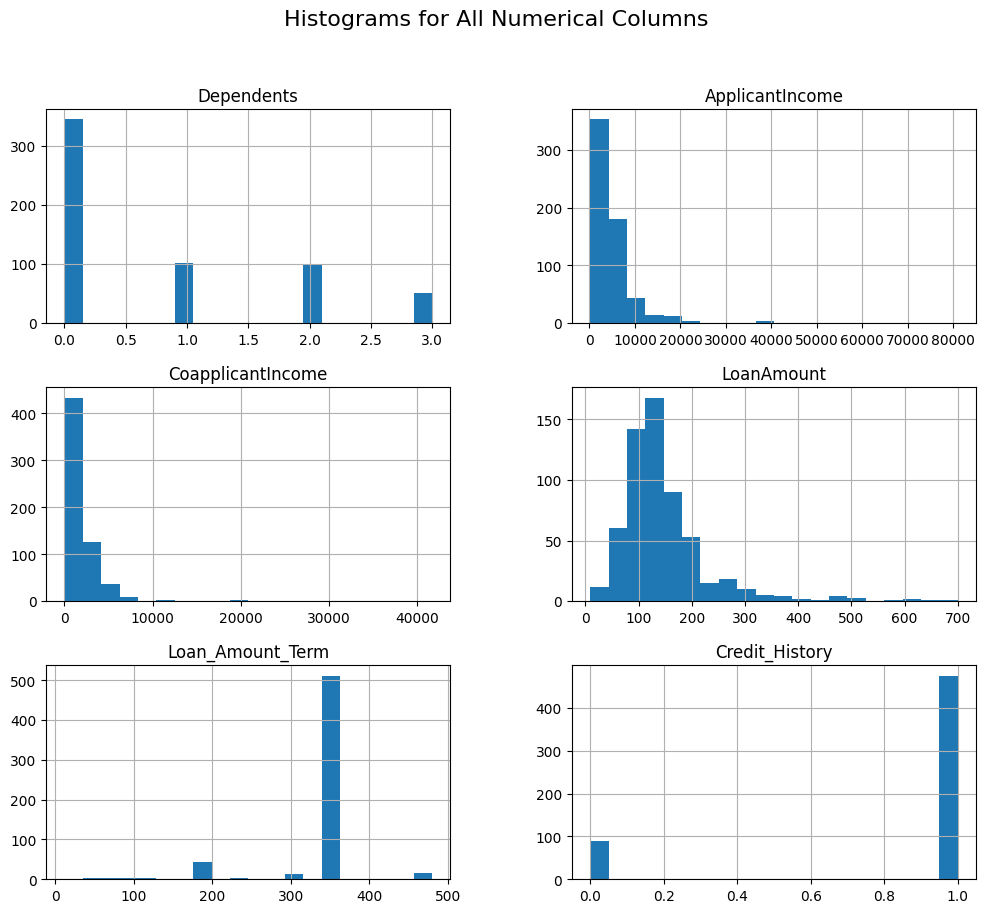

In [13]:
numeric_column.hist(figsize=(12, 10), bins=20)
plt.suptitle("Histograms for All Numerical Columns", fontsize=16)
plt.show()


In [14]:
numeric_column['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

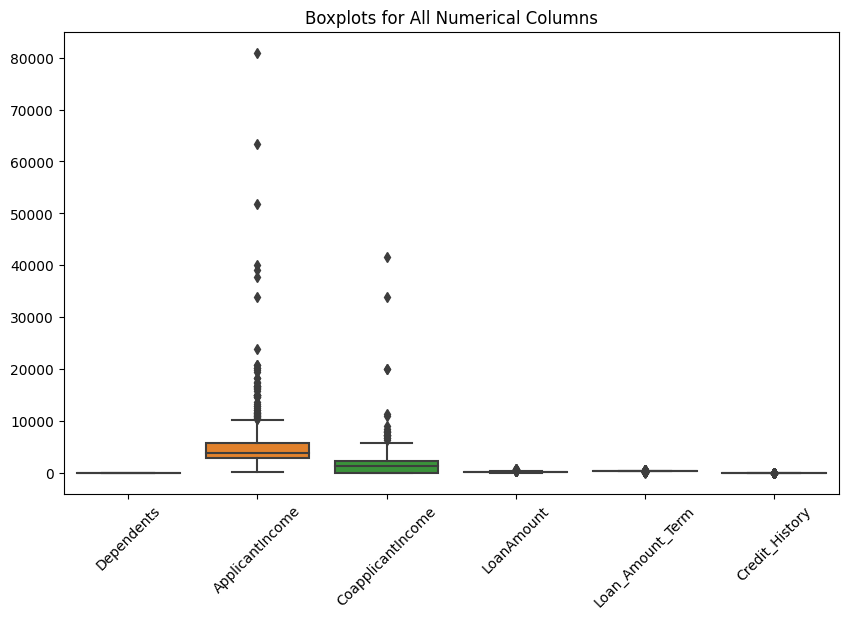

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=numeric_column)
plt.title("Boxplots for All Numerical Columns")
plt.xticks(rotation=45)
plt.show()

In [16]:
numeric_column.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,599.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,0.762938,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,1.015216,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,2.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [17]:
Xtrain , Xtest , Ytrain , Ytest= train_test_split(input_values,output_values , test_size=0.2 , random_state=42)

In [18]:
numeric_pipeline=make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    PowerTransformer(method='yeo-johnson')
)

In [19]:
categorical_column.sample(10)
# categorical_column.nunique()

,Gender,Married,Education,Self_Employed,Property_Area
532,Male,No,Graduate,No,Rural
384,Male,Yes,Graduate,No,Urban
375,Male,Yes,Graduate,No,Urban
282,Male,Yes,Graduate,No,Urban
129,Male,Yes,Graduate,No,Rural
103,Male,Yes,Graduate,No,Semiurban
228,Male,NaN,Graduate,No,Semiurban
310,Female,No,Graduate,No,Semiurban
514,Male,No,Graduate,No,Rural
102,Male,Yes,Graduate,No,Urban


In [20]:
categorical_Ordinal_pipeline=make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OrdinalEncoder(categories=[['Not Graduate','Graduate']])
)

In [21]:
categorical_onehot_pipeline=make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(drop='first',handle_unknown='ignore')
)

In [22]:
transformer=ColumnTransformer(transformers=[
    ('num_pipe', numeric_pipeline,numeric_column.columns),
    ('ordi_cate_pipe',categorical_Ordinal_pipeline,['Education']),
    ('onehot_cate_pipe',categorical_onehot_pipeline ,categorical_column.drop('Education',axis=1).columns )
],remainder='passthrough')

In [23]:
model=make_pipeline(
    transformer,
    LogisticRegression()
)

In [24]:
model.fit(Xtrain,Ytrain)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler()),
                                                                  ('powertransformer',
                                                                   PowerTransformer())]),
                                                  Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_Hi...
                                                                   OrdinalEncoder(categories=[['Not '
                                                                                               'Graduate',
                                                                                               'Graduate']]))]),
                                                  ['Education']),
                                                 ('onehot_cate_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Married', 'Self_Employed', 'Property_Area'], dtype='object'))])),
                ('logisticregression', LogisticRegression())])

In [25]:
prediction=model.predict(Xtest)
print(f"Accuracy score of the model is:{accuracy_score(prediction,Ytest)}")

Accuracy score of the model is:0.7886178861788617


In [26]:
cross_val_score(model, input_values, output_values, cv=5).mean()

0.8061975209916034

In [ ]:
user_input = input("Enter values (Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area): ")


KeyboardInterrupt: Interrupted by user